<a href="https://colab.research.google.com/github/arya-sharma-codes/Medical_costs/blob/main/Medical_Costs_Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
pwd

'/content'

In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
#already need not be done again and again
!kaggle datasets download -d mirichoi0218/insurance

In [5]:
# import packages
import numpy as np #For scientific computing
import pandas as pd #For data manipulation 
import matplotlib.pyplot as plt #For data visualization 
import seaborn as sns #For more advamced data visualization 

In [6]:
# import the data
#df = pd.read_csv("../input/noshowappointments/KaggleV2-May-2016.csv")
data = pd.read_csv('/content/gdrive/My Drive/Kaggle/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Wrangling

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

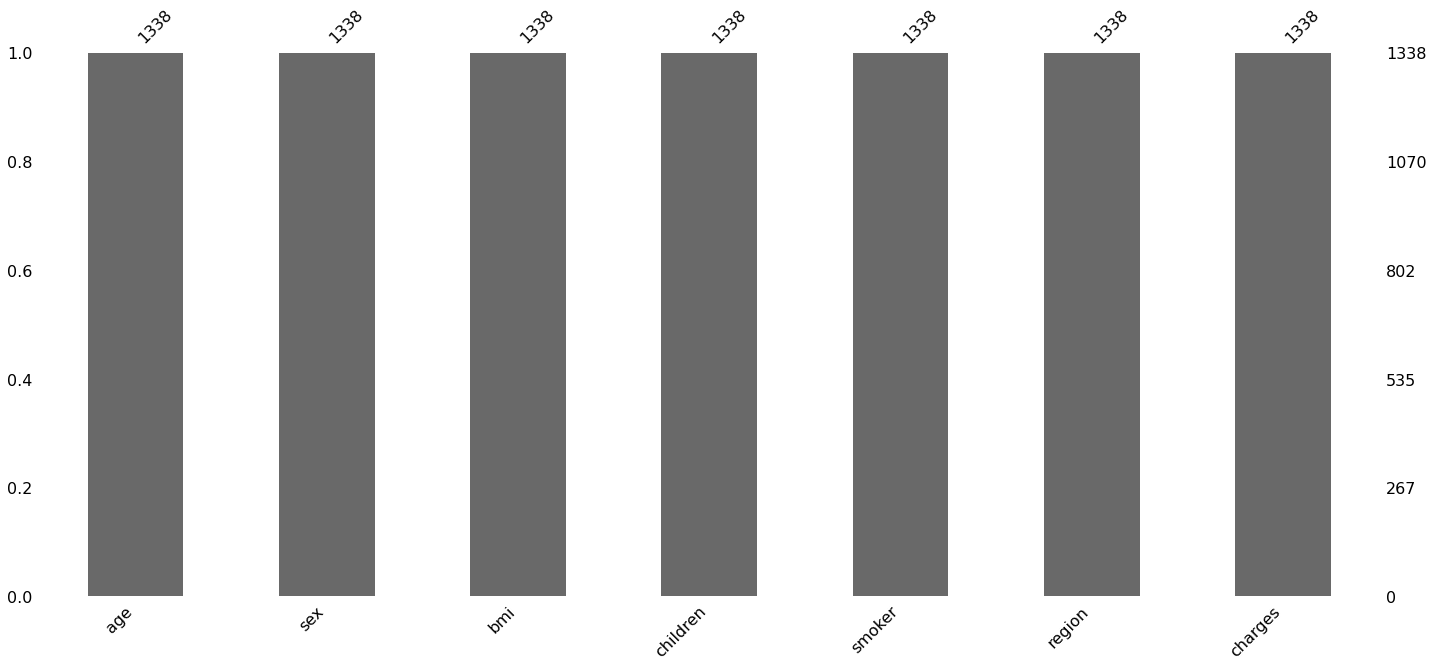

In [9]:
import missingno as msno
msno.bar(data)
plt.show()

In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

No Misspellings in the column names. No wrangling needed there.

EXPLORATORY DATA ANALYSIS

Heat Map to see correlations.

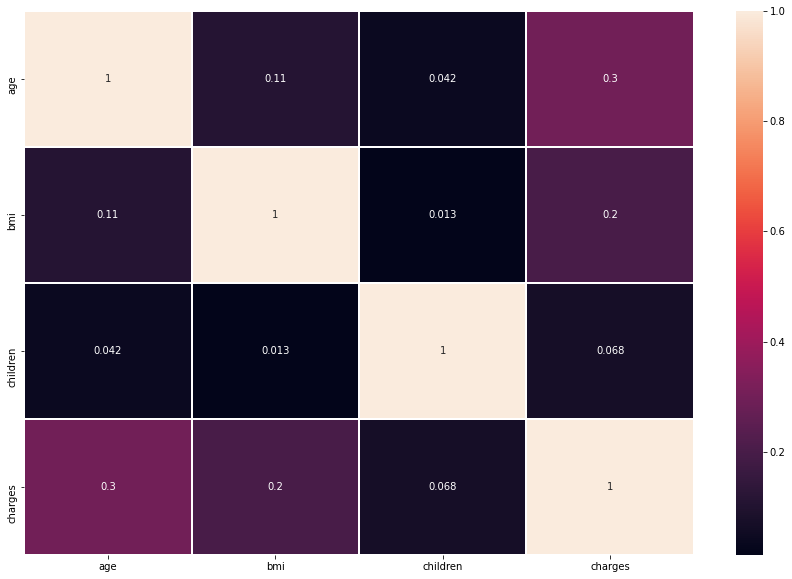

In [92]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True, linewidths = 1)
plt.show()

UNIVARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


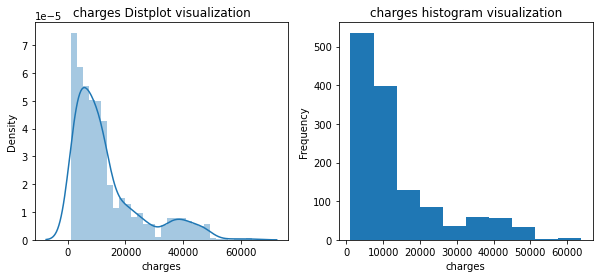

In [12]:
#using seaborn libraray and matplolib library

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["charges"])
plt.title("charges Distplot visualization")
plt.subplot(1,2,2)
plt.hist(data["charges"])
plt.xlabel("charges")
plt.ylabel("Frequency")
plt.title("charges histogram visualization")

plt.show()

From the above plots it is seen that charges are skewed on right.Not a bell curve.Also, charges manily lie under 18000

BMI DISTRIBUTION

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


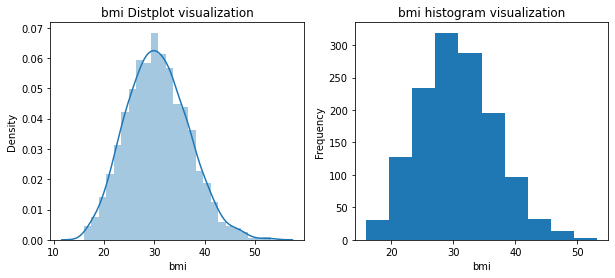

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["bmi"])
plt.title("bmi Distplot visualization")
plt.subplot(1,2,2)
plt.hist(data["bmi"])
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.title("bmi histogram visualization")

plt.show()

The bmi is distributed as a normal curve. However, mainly their are entries 25-35

AGE DISTRIBUTION

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


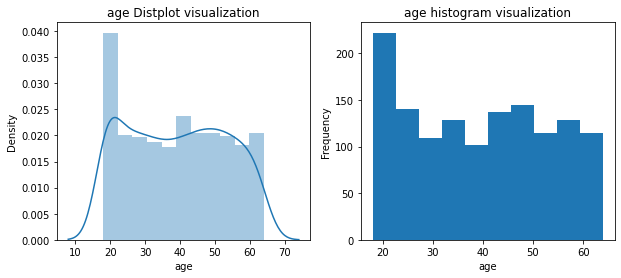

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["age"],kde=True)
plt.title("age Distplot visualization")
plt.subplot(1,2,2)
plt.hist(data["age"])
plt.xlabel("age")
plt.ylabel("Frequency")
plt.title("age histogram visualization")

plt.show()

According to the distribution mailny we have entries of the younger population

CHILDREN DISTRIBUTION

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


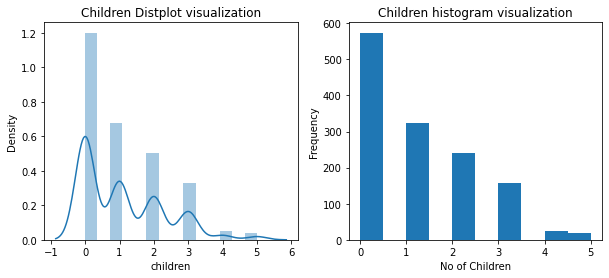

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["children"],kde=True)
plt.title("Children Distplot visualization")
plt.subplot(1,2,2)
plt.hist(data["children"])
plt.xlabel("No of Children")
plt.ylabel("Frequency")
plt.title("Children histogram visualization")

plt.show()

([<matplotlib.patches.Wedge at 0x7f1374b79a50>,
 [Text(0.2433339569121191, 1.0727481463109088, '0'),
  Text(-1.046002438240317, -0.3404098987916066, '1'),
  Text(0.0748425389560056, -1.0974509530555883, '2'),
  Text(0.9257594837824609, -0.5941122605929219, '3'),
  Text(1.0887366469207436, -0.1570111895750635, '4'),
  Text(1.0990177277424016, -0.046476167095929784, '5')],
 [Text(0.13272761286115586, 0.5851353525332229, '42.90%'),
  Text(-0.5705467844947183, -0.18567812661360358, '24.22%'),
  Text(0.04082320306691214, -0.5986096107575936, '17.94%'),
  Text(0.5049597184267968, -0.3240612330506846, '11.73%'),
  Text(0.59385635286586, -0.0856424670409437, '1.87%'),
  Text(0.5994642151322189, -0.02535063659777988, '1.35%')])

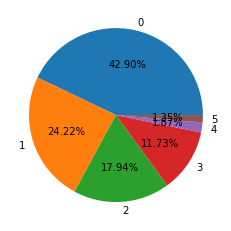

In [21]:
total = data.children.value_counts().values
Label = data.children.value_counts().index
plt.pie(total, labels =Label,autopct='%1.2f%%')

BIVARIATE ANALYSIS

Doing some prior analysis by creating some pivot tables

In [ ]:
data[['charges', 'region']].groupby(['region']).agg(['min', 'max', 'mean']).style.background_gradient(cmap='ocean')

In [ ]:
data[['charges', 'sex']].groupby(['sex']).agg(['min', 'max', 'mean']).style.background_gradient(cmap='ocean')

In [ ]:
data[['charges', 'age']].groupby(['age']).agg(['min', 'max', 'mean']).style.background_gradient(cmap='ocean')

In [ ]:
data[['charges', 'bmi']].groupby(['bmi']).agg(['min', 'max', 'mean']).style.background_gradient(cmap='ocean')

In [ ]:
data[['charges', 'smoker']].groupby(['smoker']).agg(['min', 'max', 'mean']).style.background_gradient(cmap='ocean')

Multivariate Analysis visualizations

Gender Analysis

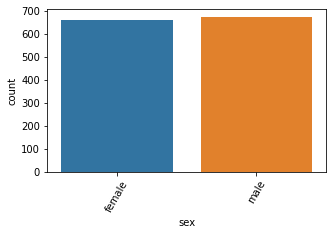

In [58]:
plt.figure(figsize=(5,3))
sns.countplot(x="sex", data = data)
plt.xticks(rotation = 60)
plt.show()

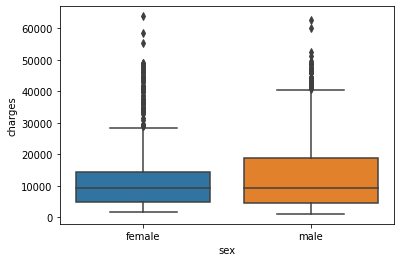

In [59]:
sns.boxplot(x= data['sex'], y = data['charges'])
plt.show()

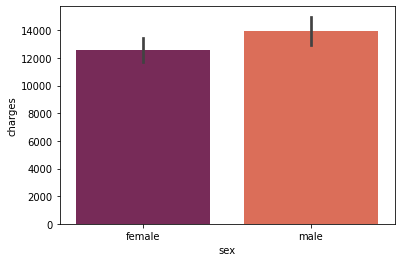

In [57]:
sns.barplot(x = data['sex'], y = data['charges'], palette= "rocket")

([<matplotlib.patches.Wedge at 0x7f136f927c90>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'male'),
  Text(0.018078568997005343, -1.0998514287589123, 'female')],
 [Text(-0.009861037634729992, 0.5999189611412249, '51%'),
  Text(0.009861037634730185, -0.5999189611412248, '49%')])

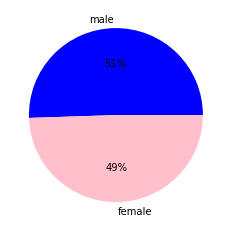

In [56]:
Total = data.sex.value_counts().values
Label = data.sex.value_counts().index
plt.pie(Total, labels = Label,autopct='%1.0f%%',colors=['blue','pink'])

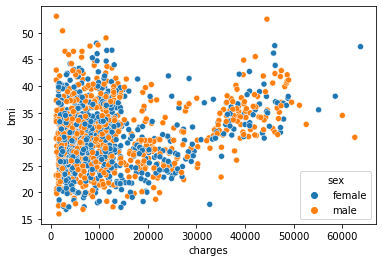

In [79]:
sns.scatterplot(x=data["charges"],
                    y=data["bmi"],
                    hue=data["sex"],
                    data=data)

Outliers exist for both genders.
Median charges for females and males is nearly same. For females it is slightlyhigher than for males.The maximum charges however for males(40k) is much higher than females(28k).

Age Analysis


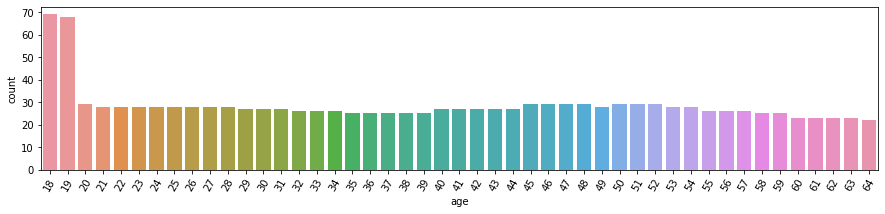

In [54]:
plt.figure(figsize=(15,3))
sns.countplot(x="age", data = data)
plt.xticks(rotation = 60)
plt.show()

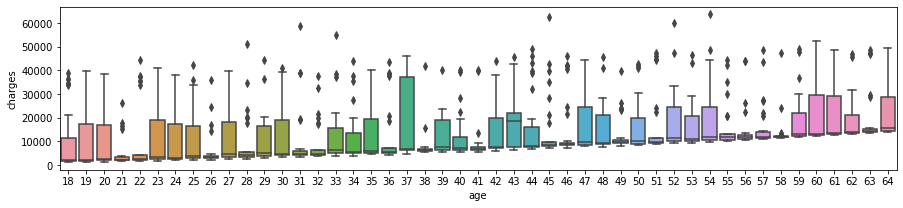

In [53]:
plt.figure(figsize=(15,3))
sns.boxplot(x= data['age'], y = data['charges'])
plt.show()

Alot of outliers exist for different ages. This indicated similar health conditions cannot be generalized for all ages,different people have different issues and hence charges. We can generalise costs on the basis of majority though.

In [51]:
#Making intervals for ages for better understanding 
data["Age_bins"] = pd.qcut(data.age, 4, labels = ["18-28", "29-39", "40-50", "51-64"])
data.Age_bins.unique()

['18-28', '29-39', '40-50', '51-64']
Categories (4, object): ['18-28' < '29-39' < '40-50' < '51-64']

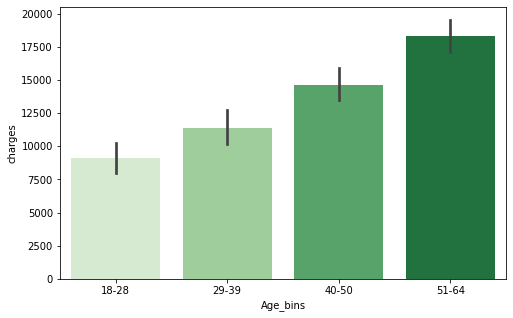

In [52]:
plt.figure(figsize=(8,5))

sns.barplot(x=data['Age_bins'], y=data['charges'], palette="Greens")


Aged people have higher charges.

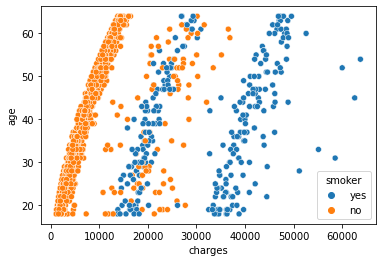

In [82]:
sns.scatterplot(x=data["charges"],
                    y=data["age"],
                    hue=data["smoker"],
                    data=data)

Smokers of more age have a higher medical expense then non smokers of same age.

Smoker Analysis

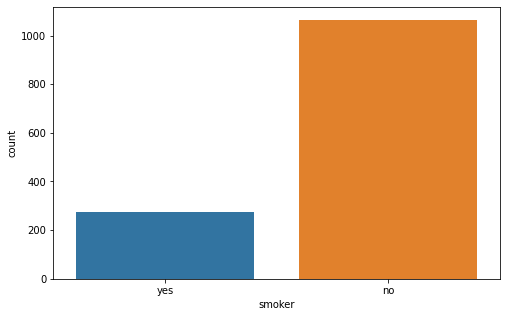

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x="smoker", data = data)
plt.show()

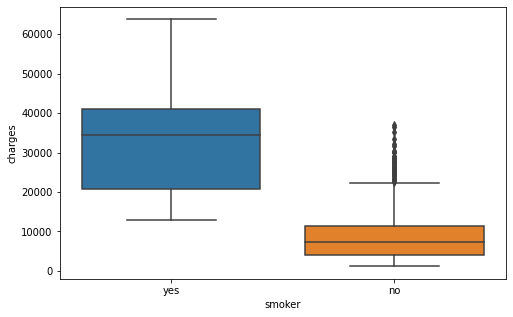

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(x= data['smoker'], y = data['charges'])

plt.show()

Median charges for smokers is higher than non smokers.

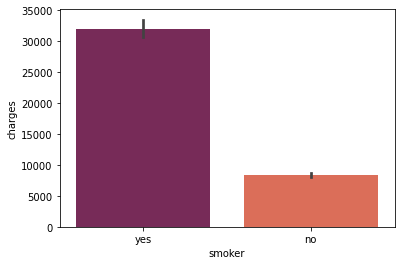

In [ ]:
sns.barplot(x = data['smoker'], y = data['charges'], palette= "rocket")

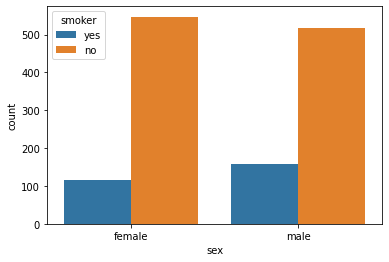

In [65]:
sns.countplot(x =data['sex'], hue = data["smoker"], data = data)
# Show the plot
plt.show()

More male smokers in the data.

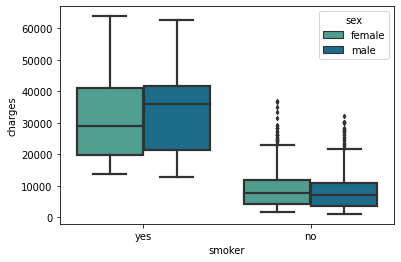

In [91]:
sns.boxplot(x=data['smoker'], y=data["charges"], hue=data["sex"], linewidth=2.2, fliersize= 3.2 ,data=data, saturation=1, palette="crest")

From above it is evident that the median of charges for males is more who are smokers as compared to females. However, the maximum charge for female smokers is more than male smokers which is interesting.

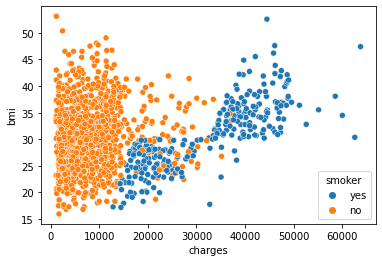

In [78]:
sns.scatterplot(x=data["charges"],
                    y=data["bmi"],
                    hue=data["smoker"],
                    data=data)

Smokers with high bmi have higher charges.

In [ ]:
sns.boxplot(x=data['smoker'], y=data["charges"], hue=data[""], linewidth=2.2, fliersize= 3.2 ,data=data, saturation=1, palette="YlOrRd")

([<matplotlib.patches.Wedge at 0x7f136fe5cc90>,
 [Text(-0.8801026332278259, 0.6598631335250117, 'no'),
  Text(0.8801026332278258, -0.6598631335250118, 'yes')],
 [Text(-0.48005598176063224, 0.3599253455590972, '80%'),
  Text(0.48005598176063213, -0.3599253455590973, '20%')])

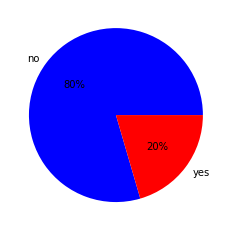

In [45]:
Total = data.smoker.value_counts().values
Label = data.smoker.value_counts().index
plt.pie(Total, labels =Label,autopct='%1.0f%%',colors=['blue','red'])

Regionwise Analysis

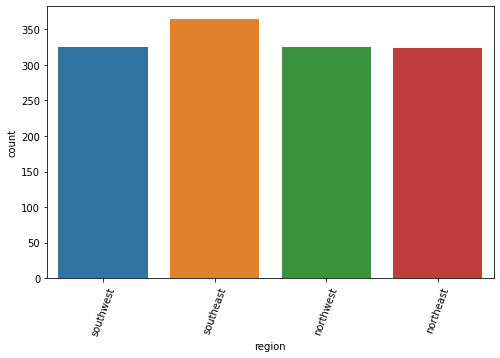

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x="region", data = data)
plt.xticks(rotation = 70)
plt.show()

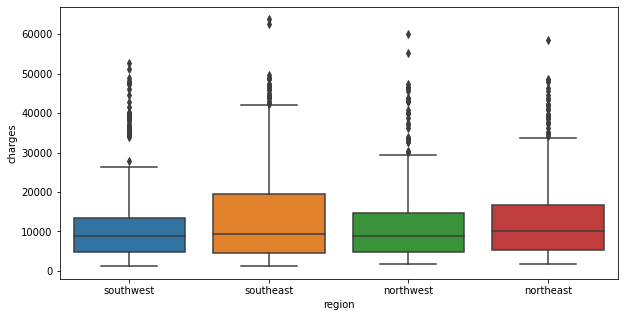

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(x= data['region'], y = data['charges'])
plt.show()

Median charges of all regions is same. However, maximum cost for the southeast region is the highest.

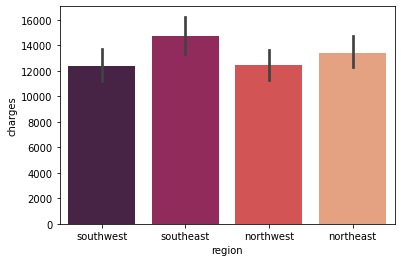

In [27]:
sns.barplot(x = data['region'], y = data['charges'], palette= "rocket")

([<matplotlib.patches.Wedge at 0x7f137021ff10>,
 [Text(0.722119686055283, 0.8297850077046582, 'southeast'),
  Text(-0.8627681631663758, 0.6823716704454532, 'southwest'),
  Text(-0.7201694244483217, -0.8314782018127556, 'northwest'),
  Text(0.7967551940047443, -0.7584069889092945, 'northeast')],
 [Text(0.39388346512106337, 0.4526100042025408, '27%'),
  Text(-0.47060081627256856, 0.37220272933388354, '24%'),
  Text(-0.39281968606272083, -0.45353356462513933, '24%'),
  Text(0.4345937421844059, -0.41367653940506965, '24%')])

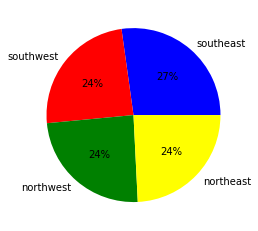

In [36]:
#Pie chart visualization of different regions
Total = data.region.value_counts().values
Label = data.region.value_counts().index
plt.pie(Total, labels = Label,autopct='%1.0f%%',colors=['blue','red','green','yellow'])

Text(0, 0.5, 'bmi')

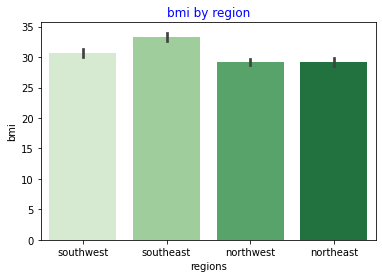

In [ ]:
sns.barplot(x = data['region'], y = data['bmi'], palette="Greens")
plt.title("bmi by region", color = "blue")
plt.xlabel("regions")
plt.ylabel("bmi")

The above graph does not indicate much about the bmi of the entire population in these regions.Therefore taking the average bmi in these regions.

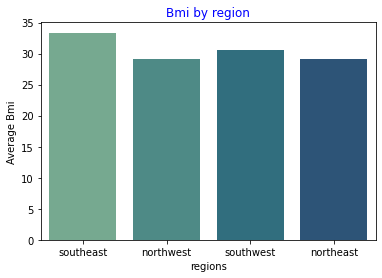

In [35]:

region_bmi = []
regions=["southeast","northwest","southwest","northeast"]

for reg in regions:
    region1 = data[data["region"] == reg]
    bmi_reg_mean = region1["bmi"].mean()
    #chargesRegion = regionn["charges"].mean()
    #regionCharges.append(chargesRegion)
    region_bmi.append(bmi_reg_mean)
    
#plt.figure(figsize=(10,5))
sns.barplot(x = regions, y = region_bmi, palette="crest")
plt.title("Bmi by region", color = "blue")
plt.xlabel("regions")
plt.ylabel("Average Bmi")

plt.show()


Bmi with respect to region might indicate some relation of the bmi and the medical costs.Therefore calculating averae medical costs of all regions.

In [31]:

region_charges = []
for reg in regions:
    region1 = data[data["region"] == reg]
    charges_reg_mean = region1["charges"].mean()
    region_charges.append(charges_reg_mean)

Text(0, 0.5, 'Average charges')

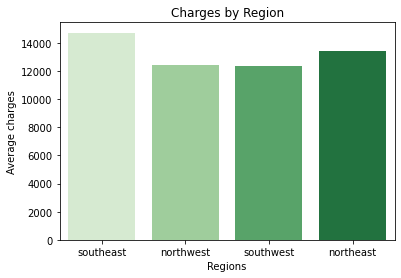

In [34]:
sns.barplot(x = regions, y = region_charges, palette= "Greens")
plt.title("Charges by Region")
plt.xlabel("Regions")
plt.ylabel("Average charges")

As we can see that the average bmi in the southeast region is the highest and so is the cost. Which also indicates that  So there is some correlation between the two factors. 

BMI Analysis

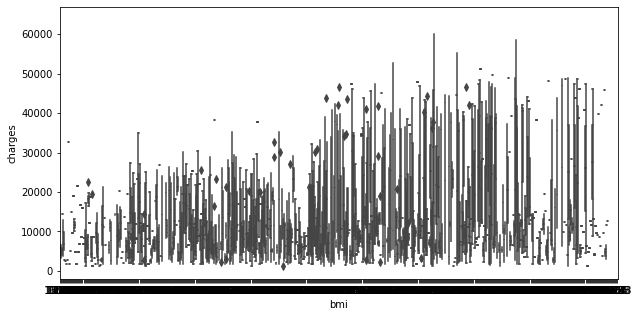

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(x= data['bmi'], y = data['charges'])
plt.show()

There alot of bmi vlaues and the visualization is not at all comprehensible. Hence grouping the bmi's and plotting them with charges to gain some insights. 

In [85]:
#Making intervals for ages for better understanding 
data["bmi_bins"] = pd.qcut(data.bmi, 15)
data.bmi_bins.unique()

[(27.74, 28.797], (33.155, 34.297], (32.032, 33.155], (21.807, 23.812], (28.797, 29.92], ..., (23.812, 25.326], (29.92, 30.875], (35.86, 37.4], (30.875, 32.032], (15.959000000000001, 21.807]]
Length: 15
Categories (15, interval[float64]): [(15.959000000000001, 21.807] < (21.807, 23.812] < (23.812, 25.326] <
                                     (25.326, 26.6] ... (34.297, 35.86] < (35.86, 37.4] <
                                     (37.4, 40.15] < (40.15, 53.13]]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

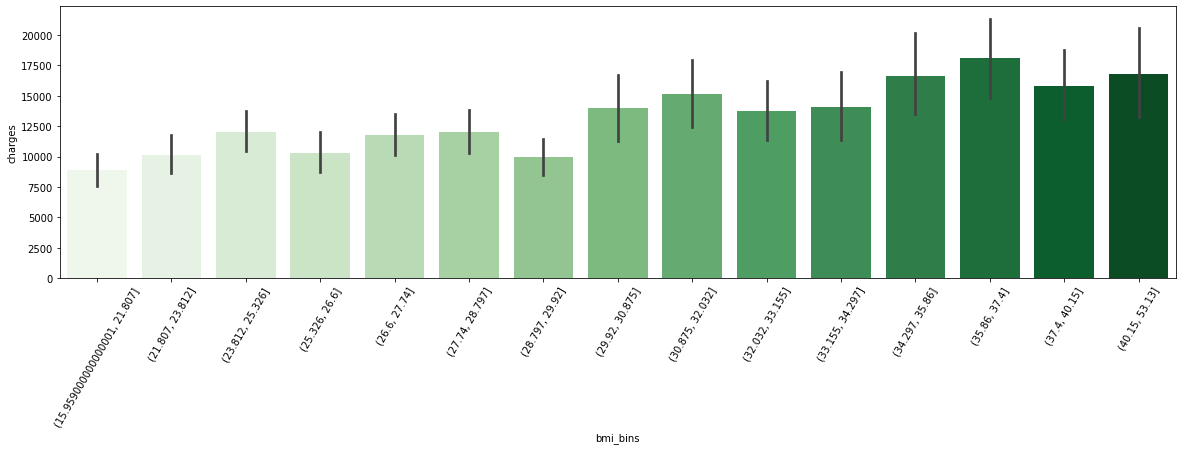

In [89]:
plt.figure(figsize=(20,5))

sns.barplot(x=data["bmi_bins"], y=data['charges'], palette="Greens")
plt.xticks(rotation=60)

Higher bmis, higher charges.

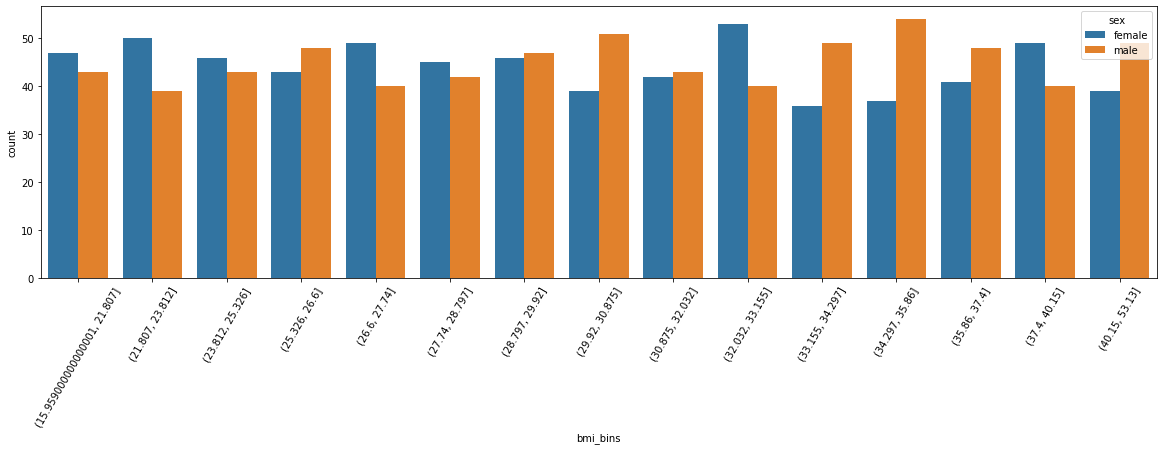

In [90]:
# count plot on two categorical variable
plt.figure(figsize=(20,5))
sns.countplot(x =data['bmi_bins'], hue = data["sex"], data = data)
plt.xticks(rotation=60)
plt.show()

Genrally males have higher bmis and hence higher medical costs.

Children Analysis

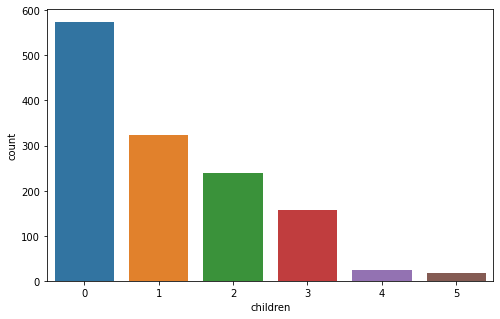

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x="children", data = data)
plt.show()

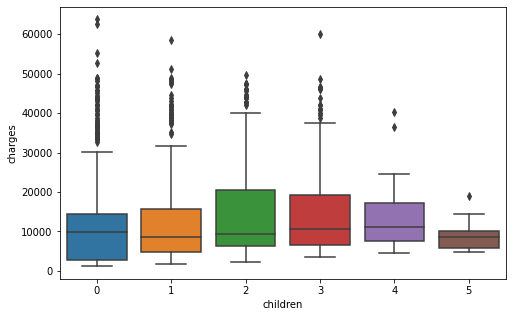

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x= data['children'], y = data['charges'])
plt.show()

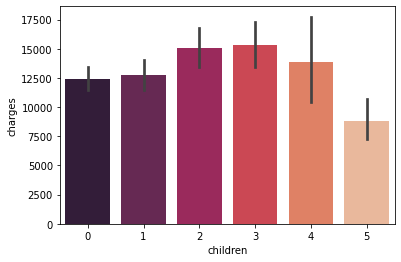

In [60]:
sns.barplot(x = data['children'], y = data['charges'], palette= "rocket")

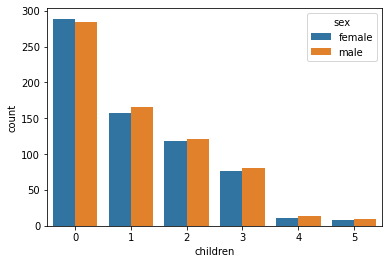

In [68]:
# count plot on two categorical variable
sns.countplot(x =data['children'], hue =data["sex"], data = data)
plt.show()

From above it is seen that people with more children have more expenses.
The mean expense is about 10k for a child. The mean expense and the maximum charge increases for more than 1 child.

Conclusion of Analysis-1
1. Males have higher medical expenses then females. One reason can be more males smokers as seen in the analysis above. Also, the entries for males is greater than females but the difference is not much. Another reason can be males having more than 1 chidren in the data as seen above. So, more children for the male entries means more expenses. Also, males have higher ranges of bmi values which can indicate seeking more medical help, leading to more expenses.
2. People with higher ages have higher medical charges which makes sense. Smokers of higher age have higher expenes than non smokers of same age.
3.Smokers with high bmi have very high medical expenses as seen from the scatter plot in the multivariate analysis.
4.People with moe children have more medical expenses.
5.Southeast region has the highest medical expense as illustrated above.Also, it is seen that people in the southeast region have higher bmis than other regions,this might be a possible reason for the southeast region having highest medical expense.
6.Average medical cost of smokers is higher than non smokers.